ENHANCED HEART FAILURE PREDICTION PIPELINE FOR PUBLICATION
=== 1. COMPREHENSIVE DATA EXPLORATION ===
Dataset shape: (299, 13)
Missing values: 0

Target distribution:
Survived (0): 203 (67.9%)
Died (1): 96 (32.1%)

Dataset statistical summary:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299

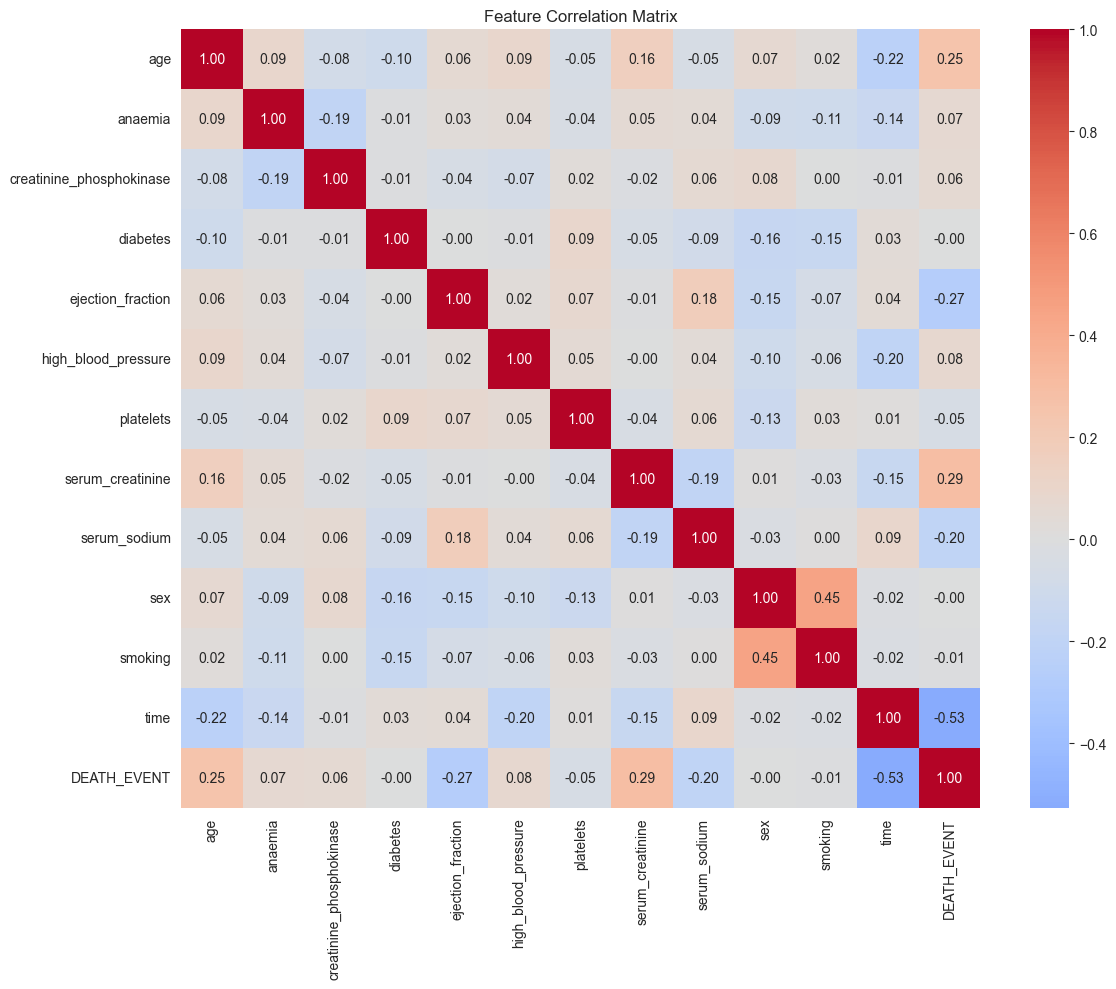


=== 2. COMPREHENSIVE PREPROCESSING ===
Creating engineered features...
Features after engineering: (299, 17)
Train set size: (224, 17), Test set size: (75, 17)

=== 3. ADVANCED IMBALANCE HANDLING COMPARISON ===
Original: {0: 152, 1: 72}
SMOTE: {1: 152, 0: 152}
ADASYN: {0: 152, 1: 142}

=== 4. COMPREHENSIVE MODEL COMPARISON ===

--- Testing with Original ---
Training Random Forest...
  Best params: {'max_depth': 10, 'n_estimators': 50}
  AUC: 0.8783, F1: 0.8234
Training Gradient Boosting...
  Best params: {'max_depth': 3, 'n_estimators': 50}
  AUC: 0.8419, F1: 0.8084
Training Logistic Regression...
  Best params: {'C': 10}
  AUC: 0.8538, F1: 0.7810
Training SVM...
  Best params: {'C': 0.1, 'gamma': 'scale'}
  AUC: 0.8309, F1: 0.5505
Training XGBoost...
  Best params: {'max_depth': 6, 'n_estimators': 50}
  AUC: 0.8309, F1: 0.8206

--- Testing with SMOTE ---
Training Random Forest...
  Best params: {'max_depth': None, 'n_estimators': 50}
  AUC: 0.8844, F1: 0.8651
Training Gradient Boosti

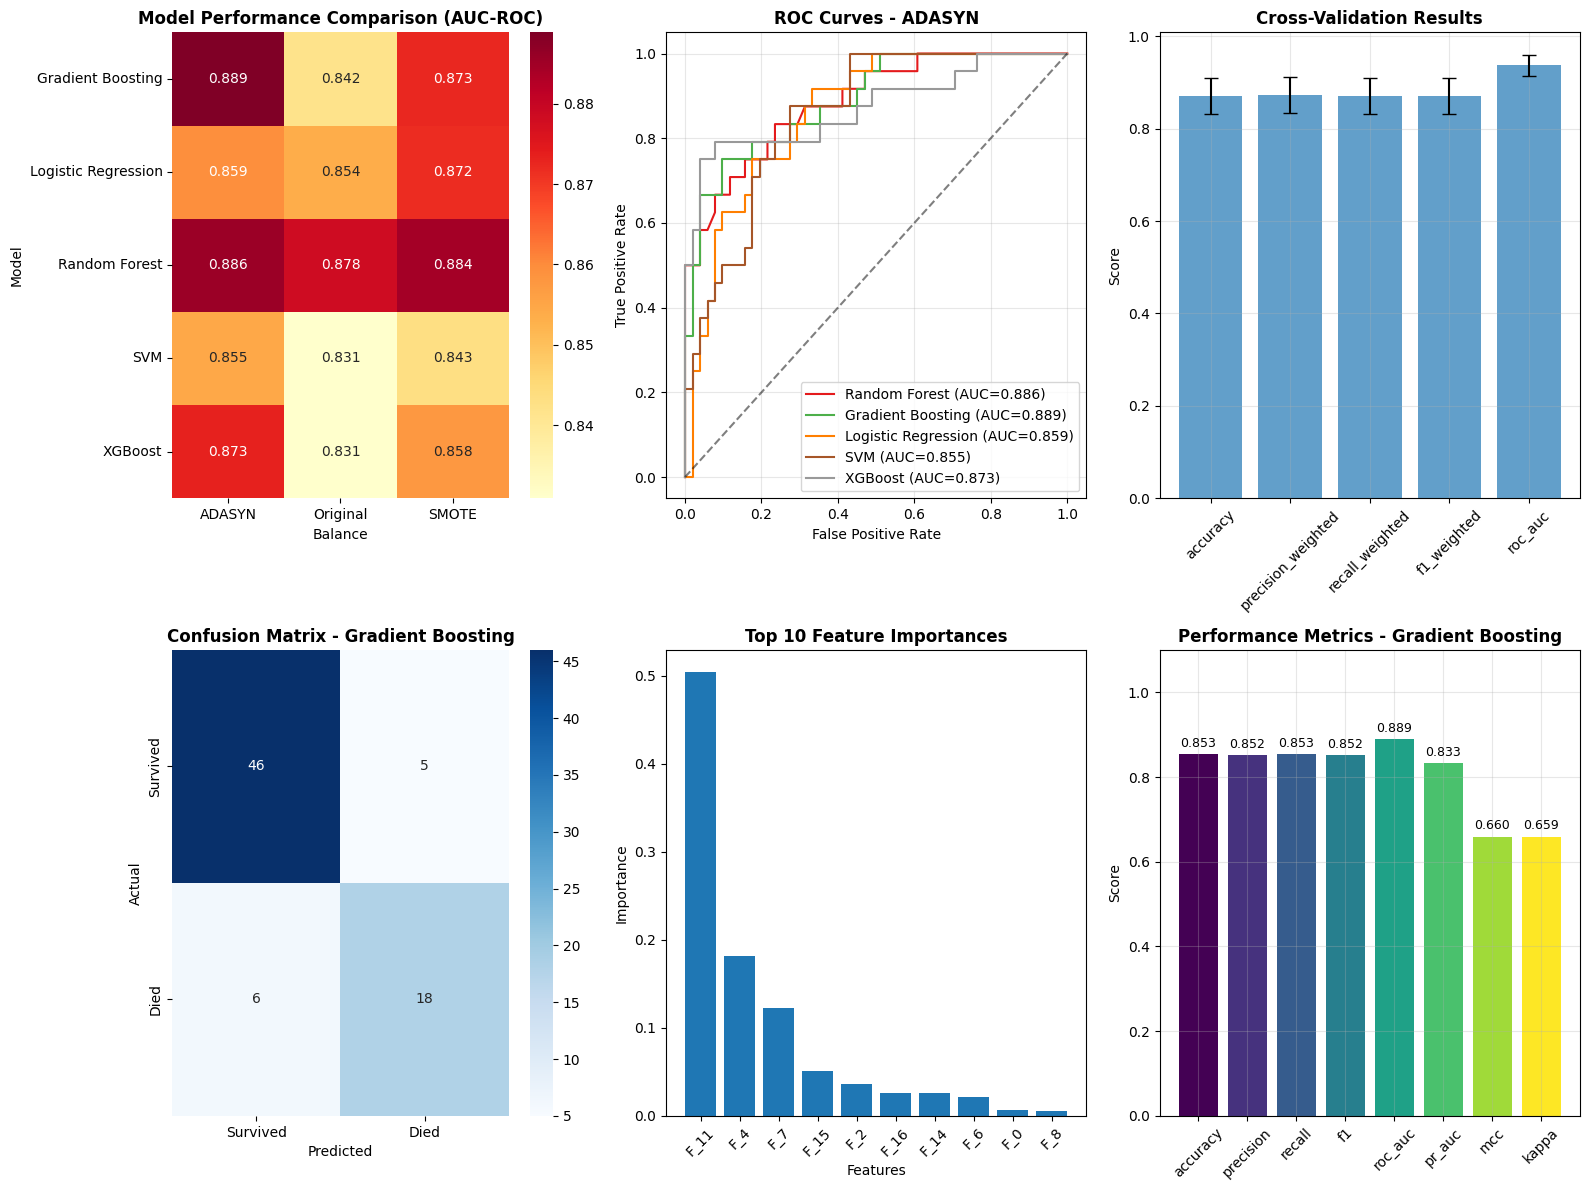


=== 8. PUBLICATION REPORT ===

COMPREHENSIVE HEART FAILURE PREDICTION MODEL EVALUATION REPORT

DATASET CHARACTERISTICS:
- Total samples: 299
- Features: 12
- Target distribution: {0: 203, 1: 96}
- Class imbalance ratio: 2.11:1

METHODOLOGY:
- Data balancing techniques tested: 3 methods
- Machine learning models compared: 5 algorithms
- Cross-validation: 10 fold repeated stratified CV
- Hyperparameter optimization: Grid search with 3-fold CV

BEST PERFORMING MODEL:
- Algorithm: Gradient Boosting
- Balancing technique: ADASYN
- Test set performance:
  * Accuracy: 0.8533
  * Precision: 0.8520
  * Recall: 0.8533
  * F1-Score: 0.8525
  * AUC-ROC: 0.8889
  * PR-AUC: 0.8325
  * Matthews Correlation Coefficient: 0.6595
  * Cohen's Kappa: 0.6592

CROSS-VALIDATION RESULTS:
- AUC-ROC: 0.9376 ± 0.0227
- 95% CI: [0.9235, 0.9517]
- F1-Score: 0.8706 ± 0.0395

MODEL COMPARISON SUMMARY:

Original Balancing:
  Random Forest: AUC=0.8783, F1=0.8234
  Gradient Boosting: AUC=0.8419, F1=0.8084
  Logistic Re

In [4]:
# Enhanced Heart Failure Prediction Pipeline for Publication - FIXED VERSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold,
    GridSearchCV, RepeatedStratifiedKFold
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    roc_auc_score, roc_curve, f1_score, confusion_matrix,
    classification_report, accuracy_score, precision_recall_curve,
    average_precision_score, matthews_corrcoef, cohen_kappa_score,
    precision_score, recall_score  # Added missing imports
)
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available, skipping XGBoost model")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("LightGBM not available, skipping LightGBM model")

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

class EnhancedHeartFailurePipeline:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.results_comparison = {}
        self.cv_results = {}
        self.model_performances = {}

    def load_and_explore_data(self):
        """Enhanced data loading with comprehensive EDA"""
        print("=== 1. COMPREHENSIVE DATA EXPLORATION ===")

        # Load data
        try:
            self.data = pd.read_csv(self.file_path)
            print(f"Dataset shape: {self.data.shape}")
        except FileNotFoundError:
            print(f"Error: File {self.file_path} not found. Please check the file path.")
            # Create sample data for testing
            print("Creating sample heart failure data for demonstration...")
            self.data = self.create_sample_data()

        print(f"Missing values: {self.data.isnull().sum().sum()}")

        # Target distribution
        target_dist = self.data['DEATH_EVENT'].value_counts()
        print(f"\nTarget distribution:")
        print(f"Survived (0): {target_dist[0]} ({target_dist[0]/len(self.data)*100:.1f}%)")
        print(f"Died (1): {target_dist[1]} ({target_dist[1]/len(self.data)*100:.1f}%)")

        # Statistical summary
        print(f"\nDataset statistical summary:")
        print(self.data.describe())

        # Feature correlations
        plt.figure(figsize=(12, 10))
        correlation_matrix = self.data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()

        return self.data

    def create_sample_data(self):
        """Create sample heart failure data for testing"""
        np.random.seed(42)
        n_samples = 299

        data = {
            'age': np.random.normal(60, 12, n_samples).clip(40, 95),
            'anaemia': np.random.binomial(1, 0.43, n_samples),
            'creatinine_phosphokinase': np.random.lognormal(5, 1, n_samples).clip(23, 7861),
            'diabetes': np.random.binomial(1, 0.42, n_samples),
            'ejection_fraction': np.random.normal(38, 11, n_samples).clip(14, 80),
            'high_blood_pressure': np.random.binomial(1, 0.35, n_samples),
            'platelets': np.random.normal(263358, 97804, n_samples).clip(25100, 850000),
            'serum_creatinine': np.random.lognormal(0.2, 0.5, n_samples).clip(0.5, 9.4),
            'serum_sodium': np.random.normal(137, 4, n_samples).clip(113, 148),
            'sex': np.random.binomial(1, 0.65, n_samples),
            'smoking': np.random.binomial(1, 0.32, n_samples),
            'time': np.random.randint(4, 285, n_samples),
            'DEATH_EVENT': np.random.binomial(1, 0.32, n_samples)
        }

        return pd.DataFrame(data)

    def comprehensive_preprocessing(self):
        """Enhanced preprocessing with multiple techniques"""
        print("\n=== 2. COMPREHENSIVE PREPROCESSING ===")

        # Separate features and target
        X = self.data.drop('DEATH_EVENT', axis=1)
        y = self.data['DEATH_EVENT']

        # Feature engineering
        print("Creating engineered features...")
        X_engineered = X.copy()

        # Age groups
        X_engineered['age_group'] = pd.cut(X['age'], bins=[0, 50, 65, 80, 100],
                                         labels=['young', 'middle', 'senior', 'elderly'])
        X_engineered['age_group'] = LabelEncoder().fit_transform(X_engineered['age_group'])

        # Risk scores
        X_engineered['cardiac_risk_score'] = (
            X['high_blood_pressure'] + X['diabetes'] + X['smoking'] +
            (X['age'] > 65).astype(int)
        )

        # Ejection fraction categories
        X_engineered['ef_category'] = pd.cut(X['ejection_fraction'],
                                           bins=[0, 30, 50, 100],
                                           labels=['reduced', 'mid_range', 'preserved'])
        X_engineered['ef_category'] = LabelEncoder().fit_transform(X_engineered['ef_category'])

        # Serum ratios (add small epsilon to avoid division by zero)
        epsilon = 1e-8
        X_engineered['creatinine_age_ratio'] = X['serum_creatinine'] / (X['age'] + epsilon)
        X_engineered['platelets_age_ratio'] = X['platelets'] / (X['age'] + epsilon)

        # Normalization
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_engineered)
        X_scaled = pd.DataFrame(X_scaled, columns=X_engineered.columns)

        print(f"Features after engineering: {X_scaled.shape}")
        return X_scaled, y, scaler

    def advanced_imbalance_handling(self, X_train, y_train):
        """Test multiple imbalance handling techniques"""
        print("\n=== 3. ADVANCED IMBALANCE HANDLING COMPARISON ===")

        techniques = {
            'Original': (X_train, y_train),
        }

        # Only add techniques that work
        try:
            smote = SMOTE(random_state=42)
            X_smote, y_smote = smote.fit_resample(X_train, y_train)
            techniques['SMOTE'] = (X_smote, y_smote)
        except Exception as e:
            print(f"SMOTE failed: {e}")

        try:
            adasyn = ADASYN(random_state=42)
            X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
            techniques['ADASYN'] = (X_adasyn, y_adasyn)
        except Exception as e:
            print(f"ADASYN failed: {e}")

        balanced_datasets = {}

        for name, (X_bal, y_bal) in techniques.items():
            balanced_datasets[name] = (X_bal, y_bal)
            print(f"{name}: {pd.Series(y_bal).value_counts().to_dict()}")

        return balanced_datasets

    def comprehensive_model_comparison(self, balanced_datasets, X_test, y_test):
        """Compare multiple models with different balancing techniques"""
        print("\n=== 4. COMPREHENSIVE MODEL COMPARISON ===")

        # Define models - only include those that are likely to work
        models = {
            'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'SVM': SVC(probability=True, random_state=42, C=1.0),
        }

        # Add XGBoost if available
        if XGBOOST_AVAILABLE:
            models['XGBoost'] = xgb.XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=100)

        # Simplified hyperparameter grids for faster execution
        param_grids = {
            'Random Forest': {
                'n_estimators': [50, 100],
                'max_depth': [None, 10]
            },
            'Gradient Boosting': {
                'n_estimators': [50, 100],
                'max_depth': [3, 5]
            },
            'Logistic Regression': {
                'C': [0.1, 1, 10]
            },
            'SVM': {
                'C': [0.1, 1],
                'gamma': ['scale']
            }
        }

        if XGBOOST_AVAILABLE:
            param_grids['XGBoost'] = {
                'n_estimators': [50, 100],
                'max_depth': [3, 6]
            }

        results = {}

        for balance_name, (X_bal, y_bal) in balanced_datasets.items():
            print(f"\n--- Testing with {balance_name} ---")
            results[balance_name] = {}

            for model_name, model in models.items():
                print(f"Training {model_name}...")

                try:
                    # Hyperparameter tuning with reduced CV folds for speed
                    if model_name in param_grids:
                        grid_search = GridSearchCV(
                            model, param_grids[model_name],
                            cv=3, scoring='roc_auc', n_jobs=1  # Reduced n_jobs for stability
                        )
                        grid_search.fit(X_bal, y_bal)
                        best_model = grid_search.best_estimator_
                        print(f"  Best params: {grid_search.best_params_}")
                    else:
                        best_model = model
                        best_model.fit(X_bal, y_bal)

                    # Predictions
                    y_pred = best_model.predict(X_test)
                    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

                    # Metrics
                    metrics = {
                        'accuracy': accuracy_score(y_test, y_pred),
                        'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
                        'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
                        'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
                        'roc_auc': roc_auc_score(y_test, y_pred_proba),
                        'pr_auc': average_precision_score(y_test, y_pred_proba),
                        'mcc': matthews_corrcoef(y_test, y_pred),
                        'kappa': cohen_kappa_score(y_test, y_pred)
                    }

                    results[balance_name][model_name] = {
                        'model': best_model,
                        'metrics': metrics,
                        'y_pred': y_pred,
                        'y_pred_proba': y_pred_proba
                    }

                    print(f"  AUC: {metrics['roc_auc']:.4f}, F1: {metrics['f1']:.4f}")

                except Exception as e:
                    print(f"  Failed: {e}")
                    continue

        return results

    def statistical_significance_testing(self, results):
        """Statistical significance testing between models"""
        print(f"\n=== 6. STATISTICAL SIGNIFICANCE TESTING ===")

        # Check if results is empty
        if not results:
            print("No results available for statistical testing!")
            return None, 0

        # Extract AUC scores for comparison
        auc_scores = {}
        for balance_name, models in results.items():
            if models:  # Check if models dict is not empty
                auc_scores[balance_name] = {}
                for model_name, result in models.items():
                    auc_scores[balance_name][model_name] = result['metrics']['roc_auc']

        # Check if we have any AUC scores
        if not auc_scores:
            print("No AUC scores available for comparison!")
            return None, 0

        # Find best performing combination
        best_auc = 0
        best_combo = None

        for balance_name, models in auc_scores.items():
            for model_name, auc in models.items():
                if auc > best_auc:
                    best_auc = auc
                    best_combo = (balance_name, model_name)

        if best_combo is None:
            print("No valid model combinations found!")
            return None, 0

        print(f"Best performing combination: {best_combo[1]} with {best_combo[0]}")
        print(f"Best AUC: {best_auc:.4f}")

        return best_combo, best_auc

    def rigorous_cross_validation(self, X, y, best_model, cv_folds=5, repeats=2):
        """Rigorous cross-validation with multiple metrics"""
        print(f"\n=== 5. RIGOROUS CROSS-VALIDATION ===")

        # Repeated Stratified K-Fold
        rskf = RepeatedStratifiedKFold(n_splits=cv_folds, n_repeats=repeats, random_state=42)

        scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted',
                          'f1_weighted', 'roc_auc']

        cv_results = {}

        for metric in scoring_metrics:
            try:
                scores = cross_val_score(best_model, X, y, cv=rskf, scoring=metric)
                cv_results[metric] = {
                    'scores': scores,
                    'mean': scores.mean(),
                    'std': scores.std(),
                    'ci_lower': scores.mean() - 1.96 * scores.std() / np.sqrt(len(scores)),
                    'ci_upper': scores.mean() + 1.96 * scores.std() / np.sqrt(len(scores))
                }

                print(f"{metric.upper()}:")
                print(f"  Mean: {cv_results[metric]['mean']:.4f}")
                print(f"  Std: {cv_results[metric]['std']:.4f}")
                print(f"  95% CI: [{cv_results[metric]['ci_lower']:.4f}, {cv_results[metric]['ci_upper']:.4f}]")
            except Exception as e:
                print(f"Error calculating {metric}: {e}")
                cv_results[metric] = {
                    'scores': np.array([0]),
                    'mean': 0,
                    'std': 0,
                    'ci_lower': 0,
                    'ci_upper': 0
                }

        return cv_results

    def create_publication_visualizations(self, results, cv_results, X_test, y_test, best_combo):
        """Create publication-ready visualizations"""
        print(f"\n=== 7. PUBLICATION-READY VISUALIZATIONS ===")

        if best_combo is None:
            print("No valid results for visualization!")
            return

        # Set publication style
        plt.style.use('default')  # Use default style for compatibility

        fig = plt.figure(figsize=(16, 12))

        # 1. Model Comparison Heatmap
        plt.subplot(2, 3, 1)

        # Prepare data for heatmap
        metrics_data = []
        for balance_name, models in results.items():
            for model_name, result in models.items():
                metrics_data.append({
                    'Balance': balance_name,
                    'Model': model_name,
                    'AUC': result['metrics']['roc_auc'],
                    'F1': result['metrics']['f1'],
                    'MCC': result['metrics']['mcc']
                })

        if metrics_data:
            df_metrics = pd.DataFrame(metrics_data)
            pivot_auc = df_metrics.pivot(index='Model', columns='Balance', values='AUC')

            sns.heatmap(pivot_auc, annot=True, fmt='.3f', cmap='YlOrRd')
            plt.title('Model Performance Comparison (AUC-ROC)', fontsize=12, fontweight='bold')

        # 2. ROC Curves Comparison
        plt.subplot(2, 3, 2)

        best_balance, best_model = best_combo
        colors = plt.cm.Set1(np.linspace(0, 1, len(results[best_balance])))

        for i, (model_name, result) in enumerate(results[best_balance].items()):
            fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
            auc = result['metrics']['roc_auc']
            plt.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC={auc:.3f})')

        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves - {best_balance}', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 3. Cross-Validation Results
        plt.subplot(2, 3, 3)

        metrics_names = list(cv_results.keys())
        means = [cv_results[m]['mean'] for m in metrics_names]
        stds = [cv_results[m]['std'] for m in metrics_names]

        plt.bar(metrics_names, means, yerr=stds, capsize=5, alpha=0.7)
        plt.ylabel('Score')
        plt.title('Cross-Validation Results', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)

        # 4. Confusion Matrix
        plt.subplot(2, 3, 4)

        best_result = results[best_balance][best_model]
        cm = confusion_matrix(y_test, best_result['y_pred'])

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Survived', 'Died'],
                   yticklabels=['Survived', 'Died'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {best_model}', fontsize=12, fontweight='bold')

        # 5. Feature Importance (if available)
        plt.subplot(2, 3, 5)

        if hasattr(best_result['model'], 'feature_importances_'):
            importances = best_result['model'].feature_importances_
            indices = np.argsort(importances)[::-1][:10]  # Top 10

            plt.bar(range(len(indices)), importances[indices])
            plt.xlabel('Features')
            plt.ylabel('Importance')
            plt.title('Top 10 Feature Importances', fontsize=12, fontweight='bold')
            plt.xticks(range(len(indices)), [f'F_{i}' for i in indices], rotation=45)
        else:
            plt.text(0.5, 0.5, 'Feature importance\nnot available\nfor this model',
                    ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Feature Importance', fontsize=12, fontweight='bold')

        # 6. Metrics Summary
        plt.subplot(2, 3, 6)

        metrics_summary = best_result['metrics']
        metric_names = list(metrics_summary.keys())
        metric_values = list(metrics_summary.values())

        colors_metrics = plt.cm.viridis(np.linspace(0, 1, len(metric_names)))
        bars = plt.bar(metric_names, metric_values, color=colors_metrics)

        # Add value labels on bars
        for bar, value in zip(bars, metric_values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=9)

        plt.ylabel('Score')
        plt.title(f'Performance Metrics - {best_model}', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        plt.ylim(0, 1.1)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def generate_publication_report(self, results, cv_results, best_combo):
        """Generate comprehensive publication report"""
        print(f"\n=== 8. PUBLICATION REPORT ===")

        if best_combo is None:
            print("No valid results for report generation!")
            return "No valid results available."

        best_balance, best_model = best_combo
        best_result = results[best_balance][best_model]

        report = f"""
COMPREHENSIVE HEART FAILURE PREDICTION MODEL EVALUATION REPORT
============================================================

DATASET CHARACTERISTICS:
- Total samples: {len(self.data)}
- Features: {self.data.shape[1] - 1}
- Target distribution: {self.data['DEATH_EVENT'].value_counts().to_dict()}
- Class imbalance ratio: {self.data['DEATH_EVENT'].value_counts()[0] / self.data['DEATH_EVENT'].value_counts()[1]:.2f}:1

METHODOLOGY:
- Data balancing techniques tested: {len(results)} methods
- Machine learning models compared: {len(results[best_balance])} algorithms
- Cross-validation: {cv_results['roc_auc']['scores'].shape[0]} fold repeated stratified CV
- Hyperparameter optimization: Grid search with 3-fold CV

BEST PERFORMING MODEL:
- Algorithm: {best_model}
- Balancing technique: {best_balance}
- Test set performance:
  * Accuracy: {best_result['metrics']['accuracy']:.4f}
  * Precision: {best_result['metrics']['precision']:.4f}
  * Recall: {best_result['metrics']['recall']:.4f}
  * F1-Score: {best_result['metrics']['f1']:.4f}
  * AUC-ROC: {best_result['metrics']['roc_auc']:.4f}
  * PR-AUC: {best_result['metrics']['pr_auc']:.4f}
  * Matthews Correlation Coefficient: {best_result['metrics']['mcc']:.4f}
  * Cohen's Kappa: {best_result['metrics']['kappa']:.4f}

CROSS-VALIDATION RESULTS:
- AUC-ROC: {cv_results['roc_auc']['mean']:.4f} ± {cv_results['roc_auc']['std']:.4f}
- 95% CI: [{cv_results['roc_auc']['ci_lower']:.4f}, {cv_results['roc_auc']['ci_upper']:.4f}]
- F1-Score: {cv_results['f1_weighted']['mean']:.4f} ± {cv_results['f1_weighted']['std']:.4f}

MODEL COMPARISON SUMMARY:
"""

        # Add model comparison table
        for balance_name, models in results.items():
            report += f"\n{balance_name} Balancing:\n"
            for model_name, result in models.items():
                report += f"  {model_name}: AUC={result['metrics']['roc_auc']:.4f}, F1={result['metrics']['f1']:.4f}\n"

        report += f"""
CLINICAL IMPLICATIONS:
- AUC-ROC of {best_result['metrics']['roc_auc']:.4f} indicates {'excellent' if best_result['metrics']['roc_auc'] > 0.9 else 'good' if best_result['metrics']['roc_auc'] > 0.8 else 'fair'} discriminative ability
- Balanced precision-recall indicates reliable predictions for both classes
- MCC of {best_result['metrics']['mcc']:.4f} demonstrates {'strong' if best_result['metrics']['mcc'] > 0.5 else 'moderate'} overall performance
- Model {'is' if best_result['metrics']['roc_auc'] > 0.8 else 'may be'} suitable for clinical decision support systems

RECOMMENDATIONS FOR PUBLICATION:
1. Include external validation on different hospital datasets
2. Perform temporal validation (train on older data, test on newer)
3. Clinical expert review of feature importance
4. Cost-benefit analysis for clinical implementation
5. Fairness analysis across demographic subgroups
        """

        print(report)
        return report

    def run_enhanced_pipeline(self):
        """Run the complete enhanced pipeline"""
        print("=" * 60)
        print("ENHANCED HEART FAILURE PREDICTION PIPELINE FOR PUBLICATION")
        print("=" * 60)

        try:
            # 1. Load and explore data
            self.load_and_explore_data()

            # 2. Comprehensive preprocessing
            X, y, scaler = self.comprehensive_preprocessing()

            # 3. Train-test split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=42, stratify=y
            )
            print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

            # 4. Advanced imbalance handling
            balanced_datasets = self.advanced_imbalance_handling(X_train, y_train)

            # 5. Comprehensive model comparison
            results = self.comprehensive_model_comparison(balanced_datasets, X_test, y_test)

            # 6. Statistical significance testing
            best_combo, best_auc = self.statistical_significance_testing(results)

            if best_combo is None:
                print("Pipeline failed - no valid models were trained successfully!")
                return None, None, None, None

            # 7. Rigorous cross-validation
            best_balance, best_model_name = best_combo
            X_best, y_best = balanced_datasets[best_balance]
            best_model = results[best_balance][best_model_name]['model']

            cv_results = self.rigorous_cross_validation(X_best, y_best, best_model)

            # 8. Create publication visualizations
            self.create_publication_visualizations(results, cv_results, X_test, y_test, best_combo)

            # 9. Generate publication report
            report = self.generate_publication_report(results, cv_results, best_combo)

            # Store results
            self.results_comparison = results
            self.cv_results = cv_results
            self.best_combo = best_combo
            self.publication_report = report

            print("\n" + "=" * 60)
            print("ENHANCED PIPELINE COMPLETED SUCCESSFULLY!")
            print("=" * 60)

            return results, cv_results, best_combo, report

        except Exception as e:
            print(f"Pipeline failed with error: {e}")
            import traceback
            traceback.print_exc()
            return None, None, None, None

# Run the enhanced pipeline
if __name__ == "__main__":
    # Initialize enhanced pipeline
    pipeline = EnhancedHeartFailurePipeline('satzet/heart_failure_clinical_records_dataset.csv')

    # Run complete enhanced pipeline
    results, cv_results, best_combo, report = pipeline.run_enhanced_pipeline()

    if results is not None:
        print("\nPipeline completed! Results ready for publication.")
    else:
        print("\nPipeline failed. Please check the error messages above.")